In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [2]:

# create the dataframe
df = pd.read_csv("cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [3]:
df.head()

,reviews,stars,date,country,verified,cleaned_reviews
0,"Not Verified | Before my flight, I was forced ...",5.0,2024-08-15,United Kingdom,False,Verified Before flight forced ground staff che...
1,✅ Trip Verified | British Airways at its bes...,1.0,2024-08-12,United Kingdom,True,British Airways best Outstanding service from ...
2,✅ Trip Verified | An excellent flight! Despite...,8.0,2024-08-12,Lebanon,True,excellent flight Despite this being hour fligh...
3,✅ Trip Verified | I recently traveled with Bri...,8.0,2024-08-11,United States,True,recently traveled with British Airways mixed e...
4,✅ Trip Verified | My family and I were booke...,3.0,2024-08-09,United Kingdom,True,family were booked leave London Hong Kong Augu...


In [4]:

df.stars.mean()

4.587528604118993

Text(0.5, 0.98, 'Counts for each ratings')

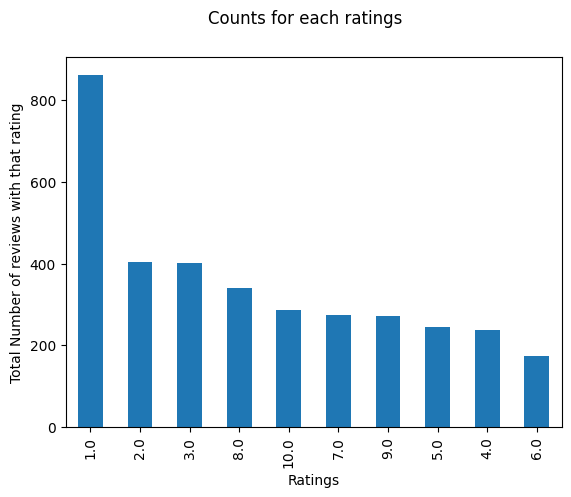

In [5]:

df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [6]:

df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings.columns = ['count']
pct_values = (df_ratings['count'].values/ df_ratings['count'].values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [7]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()


In [8]:
df_ratings.rename(columns={'index': 'stars'}, inplace=True)

In [9]:

df_ratings

,stars,count,pct_values
0,1.0,862,24.66
1,2.0,404,11.56
2,3.0,402,11.50
3,8.0,341,9.75
4,10.0,286,8.18
5,7.0,273,7.81
6,9.0,272,7.78
7,5.0,245,7.01
8,4.0,238,6.81
9,6.0,173,4.95


Text(0.5, 1.0, 'Counts for Each Ratings')

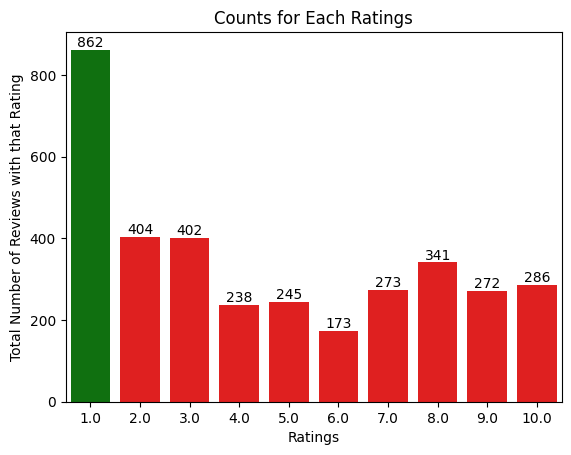

In [10]:

clrs = ['Green' if x ==  max(df_ratings['count']) else 'Red' for x in df_ratings['count']]
ax = sns.barplot(x='stars', y='count', data=df_ratings, errwidth=0, palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of Reviews with that Rating")
ax.set_title("Counts for Each Ratings")

In [11]:

# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [12]:
# Get the count of reviews per country and reset the index
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [13]:
# Check the columns before renaming
print("Columns before renaming:", df_country_review.columns)

Columns before renaming: Index(['country', 'count'], dtype='object')


In [14]:
# Renaming the columns correctly
df_country_review.rename(columns={'index': 'country', df_country_review.columns[1]: 'count'}, inplace=True)

In [15]:

# Check the columns after renaming
print("Columns after renaming:", df_country_review.columns)

Columns after renaming: Index(['country', 'count'], dtype='object')


Text(0, 0.5, 'Number of Reviews')

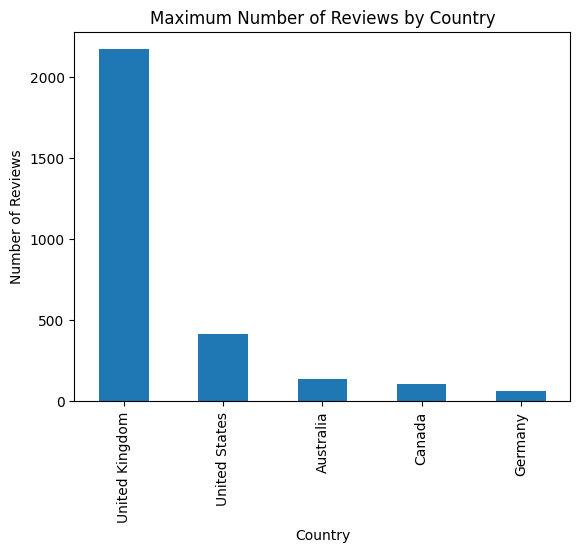

In [16]:
# Plotting the bar chart
df_country_review.plot(kind="bar", x='country', y='count', legend=False)

# Adding title and labels
plt.title("Maximum Number of Reviews by Country")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")

In [20]:
# Convert the 'stars' column to numeric, forcing errors to NaN
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')


In [21]:
# Drop rows with NaN in the 'stars' column
df = df.dropna(subset=['stars'])


In [23]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [24]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

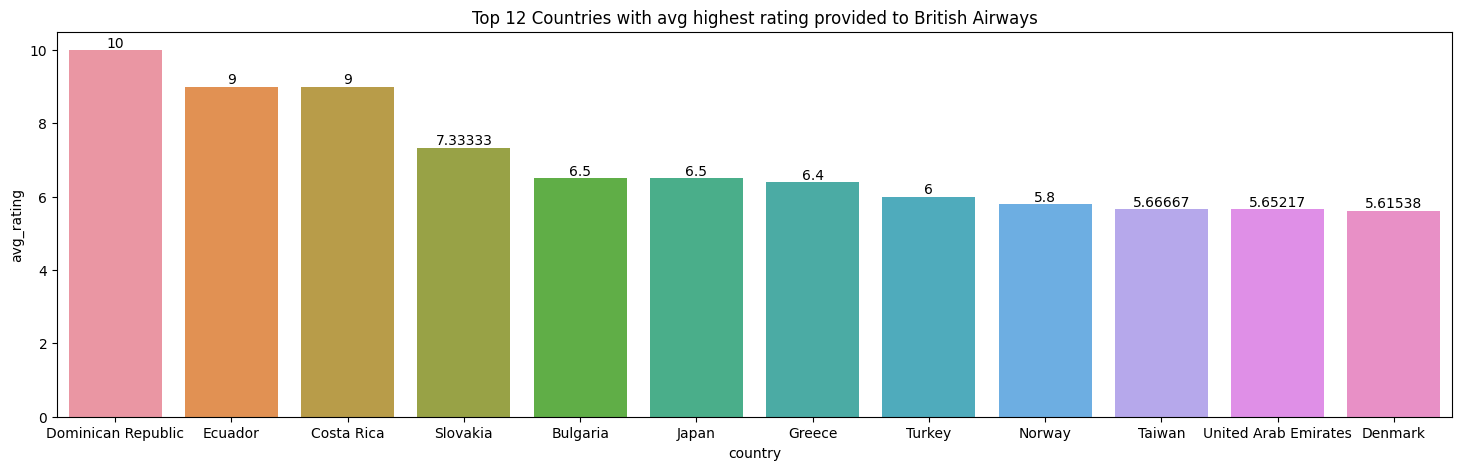

In [25]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [26]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

C:\Users\USER\AppData\Local\Temp\ipykernel_2076\2868391314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)


In [27]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

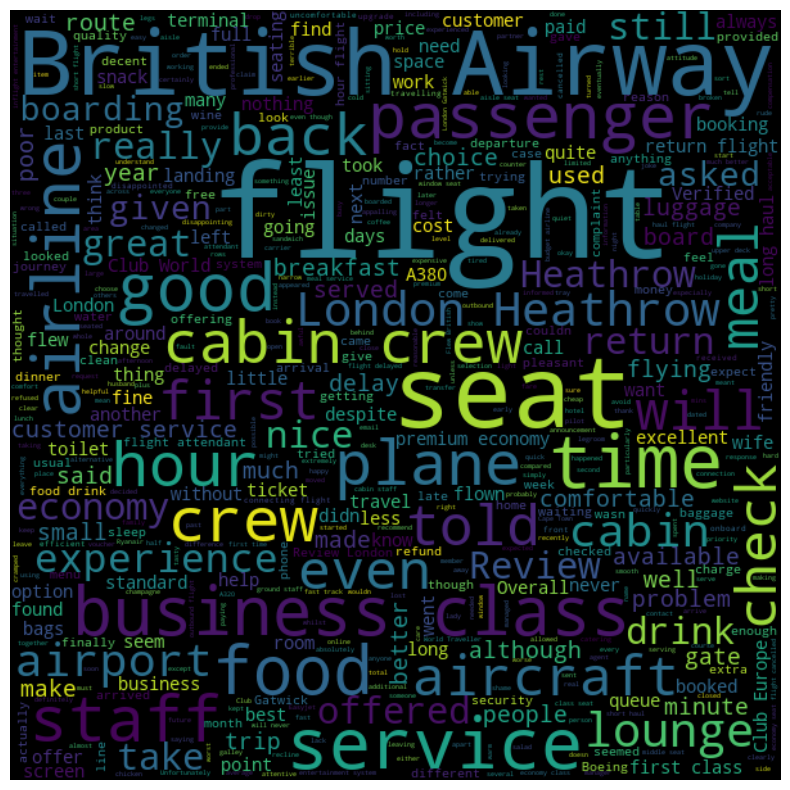

In [35]:

# Start with one review:
reviews = " ".join(df.cleaned_reviews)
plt.figure(figsize=(20,10))


# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
from textblob import TextBlob

# Set 'polarity' and 'subjectivity' columns in the DataFrame
df['polarity'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Optionally, display the DataFrame to verify the new columns
print(df.head())


                                             reviews  stars       date  \
0  Not Verified | Before my flight, I was forced ...    5.0 2024-08-15   
1  ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
2  ✅ Trip Verified | An excellent flight! Despite...    8.0 2024-08-12   
3  ✅ Trip Verified | I recently traveled with Bri...    8.0 2024-08-11   
4  ✅ Trip Verified |   My family and I were booke...    3.0 2024-08-09   

          country  verified  \
0  United Kingdom     False   
1  United Kingdom      True   
2         Lebanon      True   
3   United States      True   
4  United Kingdom      True   

                                     cleaned_reviews  polarity  label  \
0  Verified Before flight forced ground staff che... -0.166667     -1   
1  British Airways best Outstanding service from ...  0.582037      1   
2  excellent flight Despite this being hour fligh...  0.319577      1   
3  recently traveled with British Airways mixed e... -0.012778     -1   
4  

In [38]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2511 number of reviews between -0.2 and 0.2 polarity score
1601 number of reviews between -0.1 and 0.1 polarity score


In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# Make sure the vader_lexicon is downloaded
nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
vds = SentimentIntensityAnalyzer()

# Define a function to label sentiment
def get_sentiment_label(text):
    score = vds.polarity_scores(text)['compound']
    if score > 0.2:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

# Apply the function to the 'cleaned_reviews' column
df['label'] = df['cleaned_reviews'].apply(get_sentiment_label)

# Optionally, display the DataFrame to verify the new 'label' column
print(df.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             reviews  stars       date  \
0  Not Verified | Before my flight, I was forced ...    5.0 2024-08-15   
1  ✅ Trip Verified |   British Airways at its bes...    1.0 2024-08-12   
2  ✅ Trip Verified | An excellent flight! Despite...    8.0 2024-08-12   
3  ✅ Trip Verified | I recently traveled with Bri...    8.0 2024-08-11   
4  ✅ Trip Verified |   My family and I were booke...    3.0 2024-08-09   

          country  verified  \
0  United Kingdom     False   
1  United Kingdom      True   
2         Lebanon      True   
3   United States      True   
4  United Kingdom      True   

                                     cleaned_reviews  polarity  label  \
0  Verified Before flight forced ground staff che... -0.166667     -1   
1  British Airways best Outstanding service from ...  0.582037      1   
2  excellent flight Despite this being hour fligh...  0.319577      1   
3  recently traveled with British Airways mixed e... -0.012778     -1   
4  

In [41]:
df.label.value_counts()

label
 1    2053
-1    1119
 0     324
Name: count, dtype: int64

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an object of CountVectorizer
vect = CountVectorizer()

# Apply transformation to the 'cleaned_reviews' column
tf = vect.fit_transform(df['cleaned_reviews']).toarray()

# Get the feature names
tf_feature_names = vect.get_feature_names_out()

# Display the feature names (optional)
print(tf_feature_names)


['0027' '0038' '0053' ... 'zürich' 'álex' 'über']


In [49]:
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Declare the number of topics
number_of_topics = 8

# Ensure tf and tf_feature_names are correctly defined before this code runs
if 'tf' in globals() and 'tf_feature_names' in globals():
    
    # Initialize the LDA model
    model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

    # Fit the term frequency data to the model
    model.fit(tf)

    # Create an empty dictionary to store key-value pairs of topic numbers and their weights
    topic_dict = {}

    # Loop through model components
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = [
            tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]
        ]
        topic_dict["Topic %d weights" % (topic_idx)] = [
            '{:.1f}'.format(topic[i]) for i in topic.argsort()[:-10 - 1:-1]
        ]

    # Create a DataFrame from the topic dictionary
    df_topic = pd.DataFrame(topic_dict)
    
    # Optionally, print the DataFrame to verify
    print(df_topic)

else:
    print("Ensure that 'tf' and 'tf_feature_names' are correctly defined.")


  Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          with           931.4        flight           644.4        flight   
1          this           733.4          with           639.4          they   
2          that           649.2       british           508.1          that   
3          have           562.6       airways           500.4          with   
4        flight           540.6          from           444.4          have   
5          were           437.1          this           414.5          this   
6       airways           417.8          food           359.5          from   
7          from           415.5        london           358.7          were   
8       british           410.6          have           315.9       british   
9       service           401.9      heathrow           308.9       airways   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          2123.7          with           630.6  

In [50]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.08027047, 0.00954482],
       [0.00743951, 0.05985016],
       [0.08759004, 0.17058419],
       ...,
       [0.13070518, 0.22294849],
       [0.01556825, 0.08480528],
       [0.06301325, 0.12288353]])

In [51]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [52]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,that,24.6,with,12.1
1,flight,22.2,were,9.1
2,they,20.9,very,7.5
3,have,12.0,flight,7.2
4,with,10.0,service,6.0
5,this,9.6,crew,5.8
6,were,9.0,seat,5.8
7,from,7.9,this,5.7
8,british,6.8,food,5.7
9,airways,6.6,good,5.4
